<a href="https://colab.research.google.com/github/Callum-Roberts713/MiscPythonCode/blob/main/Topics_on_data_science_assignment_2_Callum_Roberts_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as ts
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy as sc
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [ ]:
data = pd.read_csv('coffeeData_3.csv', sep=";")

In [ ]:
data

,NAME,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,LB,37,47,46,24,28,24,23,19,22,...,11,17,1,4,0,0,2,0,2,7
1,GF,41,35,47,16,10,36,29,57,44,...,1,1,3,1,0,0,0,0,0,0
2,JK,46,24,42,17,25,24,14,20,21,...,0,0,0,0,2,0,0,0,0,0
3,BG,27,30,23,12,21,24,25,26,30,...,28,13,19,33,23,42,16,32,26,19
4,CJ,20,5,0,0,0,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0
5,YG,41,48,18,15,14,5,4,7,0,...,0,0,0,0,0,0,0,0,0,0
6,ML,6,18,43,27,17,19,13,26,19,...,16,32,26,20,4,11,0,0,0,0
7,MP,34,31,30,19,25,27,19,29,16,...,1,22,18,27,24,11,33,23,34,26
8,GR,14,12,23,13,17,16,10,15,10,...,0,0,0,0,0,0,0,0,0,0
9,DB,3,13,8,4,5,5,1,7,8,...,15,4,4,8,14,7,17,17,22,15


I decided to choose the coffee data set and my initial thoughts for general analysis is to see if there is a repeating pattern in the average coffee drank over extended periods of time, i would predict that the months with higher coffee consumption are likely to be winter as people are more likely to drink warm drinks in the cold weather.

In [ ]:
datamean=data.iloc[:-1]
datamean


,NAME,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,LB,37,47,46,24,28,24,23,19,22,...,11,17,1,4,0,0,2,0,2,7
1,GF,41,35,47,16,10,36,29,57,44,...,1,1,3,1,0,0,0,0,0,0
2,JK,46,24,42,17,25,24,14,20,21,...,0,0,0,0,2,0,0,0,0,0
3,BG,27,30,23,12,21,24,25,26,30,...,28,13,19,33,23,42,16,32,26,19
4,CJ,20,5,0,0,0,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0
5,YG,41,48,18,15,14,5,4,7,0,...,0,0,0,0,0,0,0,0,0,0
6,ML,6,18,43,27,17,19,13,26,19,...,16,32,26,20,4,11,0,0,0,0
7,MP,34,31,30,19,25,27,19,29,16,...,1,22,18,27,24,11,33,23,34,26
8,GR,14,12,23,13,17,16,10,15,10,...,0,0,0,0,0,0,0,0,0,0
9,DB,3,13,8,4,5,5,1,7,8,...,15,4,4,8,14,7,17,17,22,15


in order to test my hypothesis i will first need to obtain a mean of coffee drank per month. to do that i needed to remove the row with the total cups of coffee drank.

In [ ]:
mean1=np.mean(datamean['1'])
print(mean1)
mean2=np.mean(datamean['2'])
print(mean2)
mean3=np.mean(datamean['3'])
print(mean3)
mean4=np.mean(datamean['4'])
print(mean4)
mean5=np.mean(datamean['5'])
print(mean5)
mean6=np.mean(datamean['6'])
print(mean6)
mean7=np.mean(datamean['7'])
print(mean7)
mean8=np.mean(datamean['8'])
print(mean8)
mean9=np.mean(datamean['9'])
print(mean9)
mean10=np.mean(datamean['10'])
print(mean10)
mean11=np.mean(datamean['11'])
print(mean11)
mean12=np.mean(datamean['12'])
print(mean12)
mean13=np.mean(datamean['13'])
print(mean13)
mean14=np.mean(datamean['14'])
print(mean14)
mean15=np.mean(datamean['15'])
print(mean15)
mean16=np.mean(datamean['16'])
print(mean16)
mean17=np.mean(datamean['17'])
print(mean17)
mean18=np.mean(datamean['18'])
print(mean18)
mean19=np.mean(datamean['19'])
print(mean19)
mean20=np.mean(datamean['20'])
print(mean20)
mean21=np.mean(datamean['21'])
print(mean21)
mean22=np.mean(datamean['22'])
print(mean22)
mean23=np.mean(datamean['23'])
print(mean23)
mean24=np.mean(datamean['24'])
print(mean24)
mean25=np.mean(datamean['25'])
print(mean25)
mean26=np.mean(datamean['26'])
print(mean26)
mean27=np.mean(datamean['27'])
print(mean27)
mean28=np.mean(datamean['28'])
print(mean28)

14.75
13.5
14.7
8.65
10.85
11.7
9.9
14.15
11.6
9.35
7.4
8.95
10.3
10.35
14.25
9.7
8.85
10.6
10.15
10.4
10.05
8.9
7.1
6.4
6.35
6.2
6.75
7.05


In [ ]:
ave=np.array([mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9,mean10,mean11,mean12,mean13,mean14,mean15,mean16,mean17,mean18,mean19,mean20,mean21,mean22,mean23,mean24,mean25,mean26,mean27,mean28])
ave1=np.array([mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9,mean10,mean11,mean12,mean13,mean14])
ave2=np.array([mean15,mean16,mean17,mean18,mean19,mean20,mean21,mean22,mean23,mean24,mean25,mean26,mean27,mean28])

here i generate a mean number of coffees drank by everyone per month for each of the 28 months. i then put the values into an array such that i could use the means in graph form i also created two more arrays of the values in the first half of months and then the values in the second half to use later on.

In [ ]:
df=pd.read_csv('coffeeData_3.csv',sep=";",header=None,index_col=0).T
df
months=df['NAME']
Total=df['TOTAL']

,NAME,LB,GF,JK,BG,CJ,YG,ML,MP,GR,...,JS,TL,TF,MK,IV,CC,RS,BM,LC,TOTAL
1,1,37,41,46,27,20,41,6,34,14,...,0,0,0,0,0,0,0,0,0,295
2,2,47,35,24,30,5,48,18,31,12,...,1,0,0,0,0,0,0,0,0,270
3,3,46,47,42,23,0,18,43,30,23,...,0,0,0,0,0,0,0,0,0,294
4,4,24,16,17,12,0,15,27,19,13,...,0,20,0,0,0,0,0,0,0,173
5,5,28,10,25,21,0,14,17,25,17,...,0,37,0,0,0,0,0,0,0,217
6,6,24,36,24,24,1,5,19,27,16,...,0,37,0,0,0,0,0,0,0,234
7,7,23,29,14,25,1,4,13,19,10,...,0,29,0,0,0,0,0,0,0,198
8,8,19,57,20,26,1,7,26,29,15,...,0,36,0,0,0,0,0,0,0,283
9,9,22,44,21,30,3,0,19,16,10,...,0,36,3,0,0,0,0,0,0,232
10,10,20,43,9,29,0,2,15,12,9,...,0,24,7,0,0,0,0,0,0,187


i transposed the data set just so it would make things easier for me when trying to read data, it doesnt change anything but it made the data easier for me to look at

In [ ]:
A=stats.pearsonr(months,ave)
B=stats.spearmanr(months,ave)
C=stats.kendalltau(months,ave)
print("PearsonrResult",A,B,C)

PearsonrResult (-0.7262978185860691, 1.2114262616308441e-05) SpearmanrResult(correlation=-0.7077175697865353, pvalue=2.5287796396264843e-05) KendalltauResult(correlation=-0.5343915343915343, pvalue=3.0859337119773405e-05)


the first part of actual analysis i did was compare the average coffe drank to months using correlation coefficients, pearson and spearman results came back with a strong negative correlation suggesting that peoples average coffee consumption went down as time went on which is interesting as i expected there to be a more cyclic pattern the kendall coefficient still showed a negative correlation but not as strong of one which is interesting given this is more suited to smaller data grouds like the one i have.

<function matplotlib.pyplot.show(close=None, block=None)>

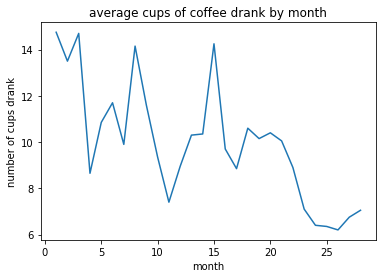

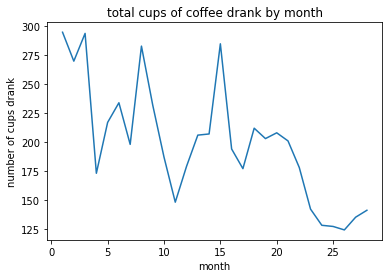

In [ ]:
plt.figure(1)
plt.plot(months,ave)
plt.title("average cups of coffee drank by month")
plt.xlabel("month")
plt.ylabel("number of cups drank")
plt.figure(2)
plt.plot(months,Total)
plt.title("total cups of coffee drank by month")
plt.xlabel("month")
plt.ylabel("number of cups drank")
plt.show

so to see what the data looks like first thing i wanted to do was create a line graph of the average coffee drank vs the number of months that had passed, which while appearing at first to have a pattern of increasing and decreasing drastically in short periods of time as i expected something interesting happens towards the end of the gaph the average seems to significantly drop off, we know that the data starts in september of 2017 however some weeks or months are missing in the data so theres no way to tell exactly when this drop off of coffee consumption happened or what exactly caused it the drop appears to begin at some point in 2019 or possibly due to enough missing dates the beginning of 2020 which would make sense as the pandemic would certainly cause a significaant drop in the data.however like i say there is no way to tell from the data when exactly this is.


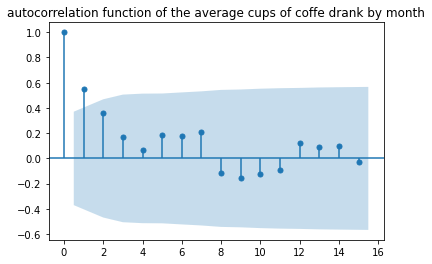

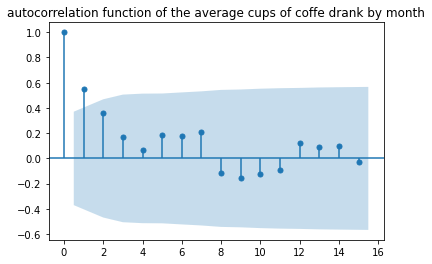

In [ ]:

plot_acf(ave,title="autocorrelation function of the average cups of coffe drank by month")


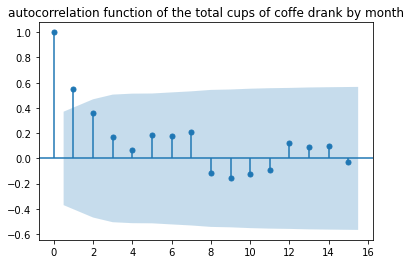

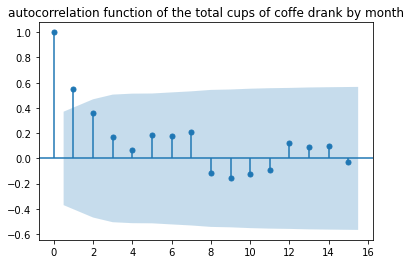

In [ ]:
plot_acf(Total,title="autocorrelation function of the total cups of coffe drank by month")

even though i was now fairly sure that my initial hypothesis was wrong in that average coffee drank was not cyclic in nature i still wanted to be sure and to have a way to visually tell one way or the other so i plotted autocorrelation functions use peaks to show how cyclic a data set is ie if there is a repeating pattern in the data. as i suspected the data begins with a large peak hinting some semblence of a pattern repeating and then it tails off at the end such that there is very little cyclic behaviour. the data looks the same when done with the total number of coffees drank per month which makes sense because this would increase and decrease in the same way as the average.

In [ ]:
names=data.groupby(["NAME"])
data["NAME"].unique()

array(['LB', 'GF', 'JK', 'BG', 'CJ', 'YG', 'ML', 'MP', 'GR', 'DB', 'MH',
       'JS', 'TL', 'TF', 'MK', 'IV', 'CC', 'RS', 'BM', 'LC', 'TOTAL'],
      dtype=object)

i thought then that maybe i would see if the pattern of having a somewhat cyclic first half of the data and then a drop of in the last year was true of individuals so i first created a list of the names to reffer to.

In [ ]:
LB=df['LB']
GF=df['GF']
JK=df['JK']
BG=df['BG']
CJ=df['CJ']
YG=df['YG']
ML=df['ML']
MP=df['MP']
GR=df['GR']
DB=df['DB']
MH=df['MH']
JS=df['JS']
TL=df['TL']
TF=df['TF']
MK=df['MK']
IV=df['IV']
CC=df['CC']
RS=df['RS']
BM=df['BM']
LC=df['LC']
Total=df['TOTAL']


here i am just creating arrays for the data for each person

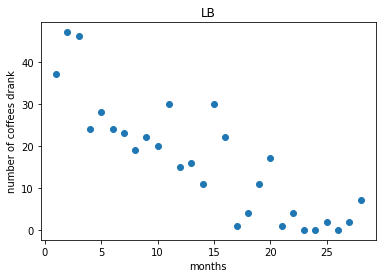

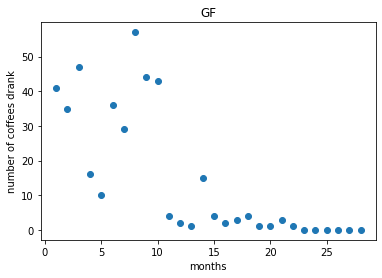

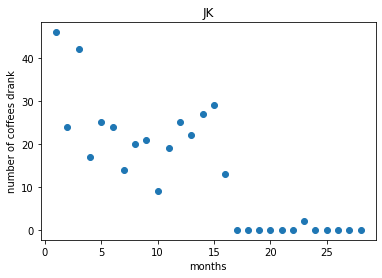

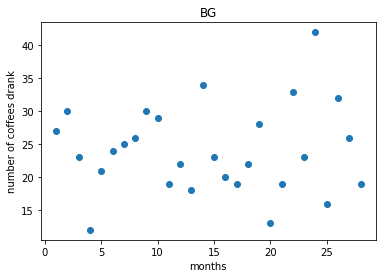

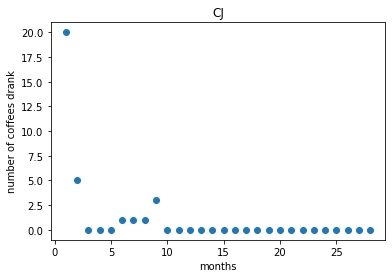

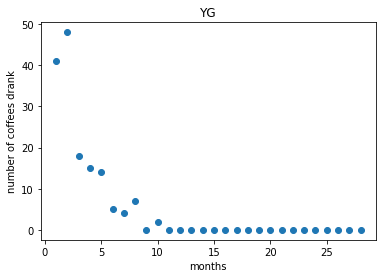

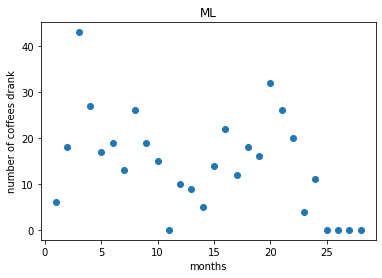

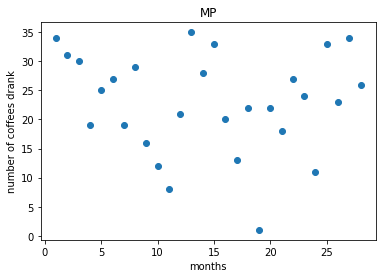

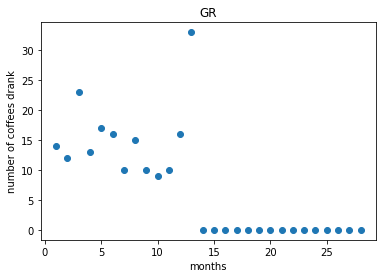

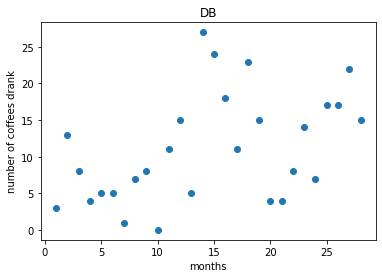

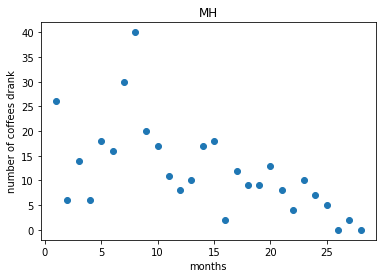

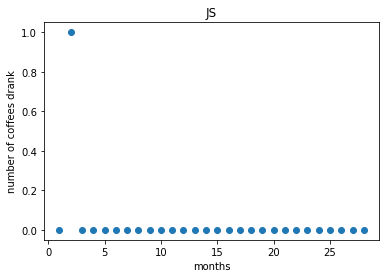

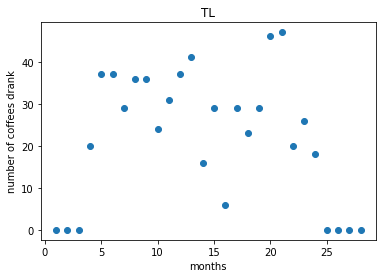

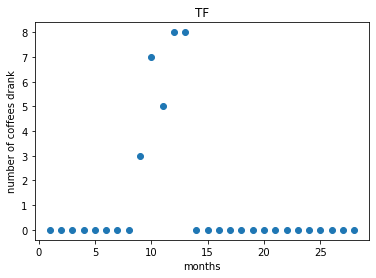

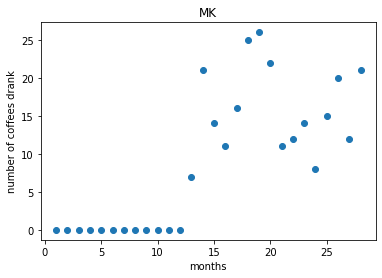

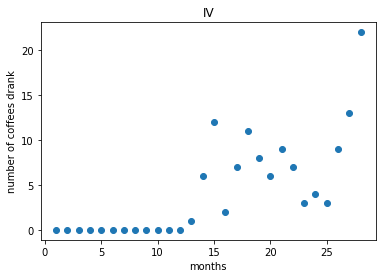

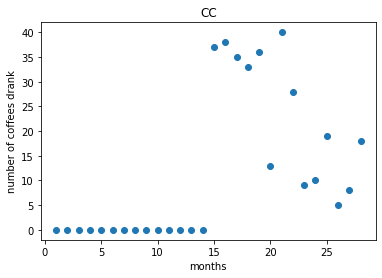

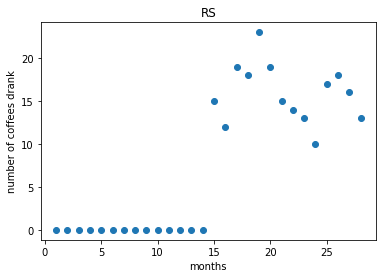

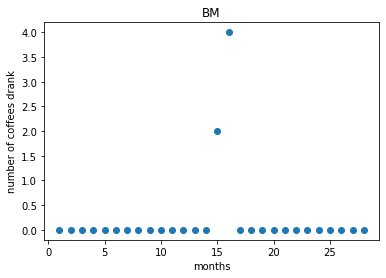

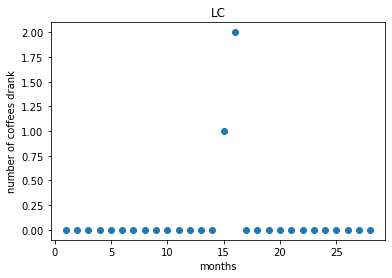

In [ ]:
plt.figure(1)
plt.scatter(months,LB)
plt.title('LB')
plt.xlabel("months")
plt.ylabel("number of coffees drank")
plt.figure(2)
plt.scatter(months,GF)
plt.title('GF')
plt.xlabel("months")
plt.ylabel("number of coffees drank")
plt.figure(3)
plt.scatter(months,JK)
plt.title('JK')
plt.xlabel("months")
plt.ylabel("number of coffees drank")
plt.figure(4)
plt.scatter(months,BG)
plt.title('BG')
plt.xlabel("months")
plt.ylabel("number of coffees drank")
plt.figure(5)
plt.scatter(months,CJ)
plt.title('CJ')
plt.xlabel("months")
plt.ylabel("number of coffees drank")
plt.figure(6)
plt.scatter(months,YG)
plt.title('YG')
plt.xlabel("months")
plt.ylabel("number of coffees drank")
plt.figure(7)
plt.scatter(months,ML)
plt.title('ML')
plt.xlabel("months")
plt.ylabel("number of coffees drank")
plt.figure(8)
plt.scatter(months,MP)
plt.title('MP')
plt.xlabel("months")
plt.ylabel("number of coffees drank")
plt.figure(9)
plt.scatter(months,GR)
plt.title('GR')
plt.xlabel("months")
plt.ylabel("number of coffees drank")
plt.figure(10)
plt.scatter(months,DB)
plt.title('DB')
plt.xlabel("months")
plt.ylabel("number of coffees drank")
plt.figure(11)
plt.scatter(months,MH)
plt.title('MH')
plt.xlabel("months")
plt.ylabel("number of coffees drank")
plt.figure(12)
plt.scatter(months,JS)
plt.title('JS')
plt.xlabel("months")
plt.ylabel("number of coffees drank")
plt.figure(13)
plt.scatter(months,TL)
plt.title('TL')
plt.xlabel("months")
plt.ylabel("number of coffees drank")
plt.figure(14)
plt.scatter(months,TF)
plt.title('TF')
plt.xlabel("months")
plt.ylabel("number of coffees drank")
plt.figure(15)
plt.scatter(months,MK)
plt.title('MK')
plt.xlabel("months")
plt.ylabel("number of coffees drank")
plt.figure(16)
plt.scatter(months,IV)
plt.title('IV')
plt.xlabel("months")
plt.ylabel("number of coffees drank")
plt.figure(17)
plt.scatter(months,CC)
plt.title('CC')
plt.xlabel("months")
plt.ylabel("number of coffees drank")
plt.figure(18)
plt.scatter(months,RS)
plt.title('RS')
plt.xlabel("months")
plt.ylabel("number of coffees drank")
plt.figure(19)
plt.scatter(months,BM)
plt.title('BM')
plt.xlabel("months")
plt.ylabel("number of coffees drank")
plt.figure(20)
plt.scatter(months,LC)
plt.title('LC')
plt.xlabel("months")
plt.ylabel("number of coffees drank")
plt.show()

interestingly after i created scatter plots for each individual person i noticed there was a number of people as i expected from the average data that completely stopped drinking coffee in the later months. however there were also a number of people who had not drank coffee during the first half, who began drinking coffee towards the end which means that my initial thoughts that the drop off in coffee during the later half most likely wasnt to do with the months being the pandemic as if some of the people only began to drink coffee during this time it must not be because the people were at home and therefore unable to drink coffee. there must be something else going on

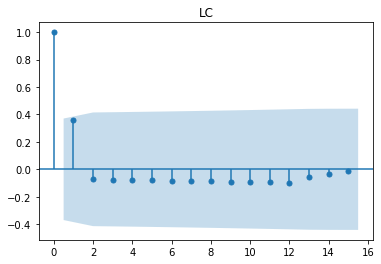

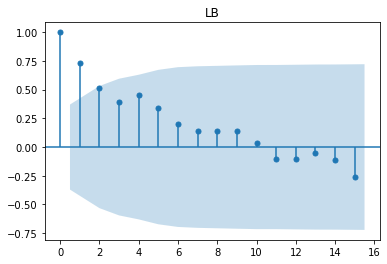

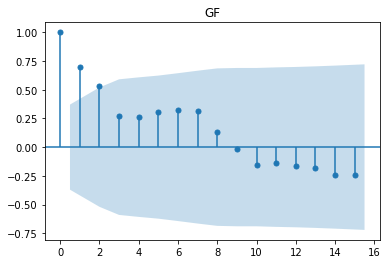

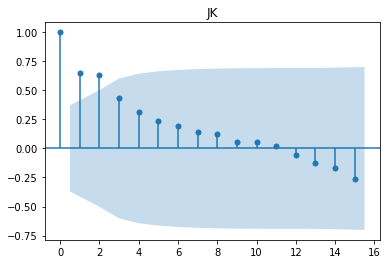

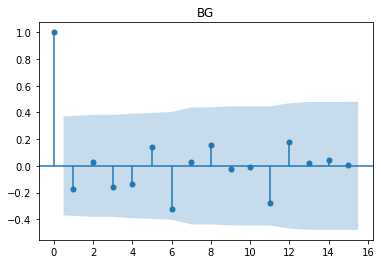

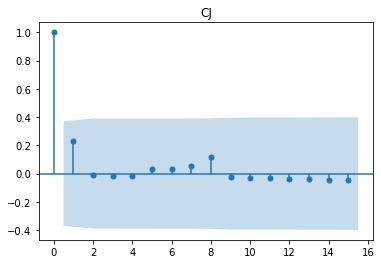

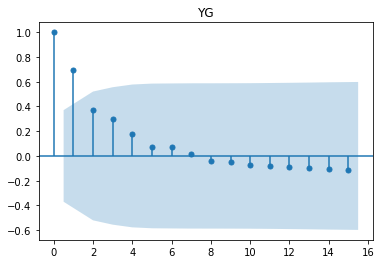

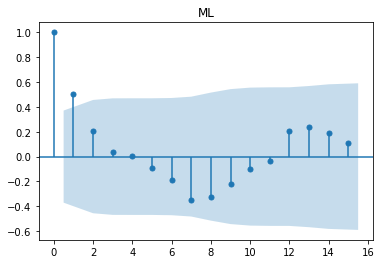

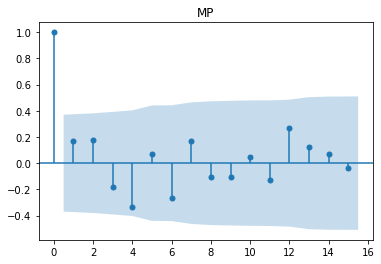

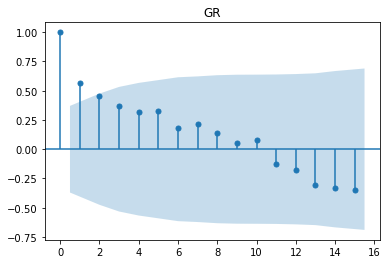

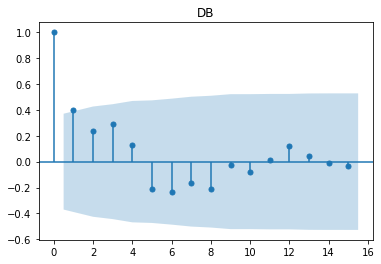

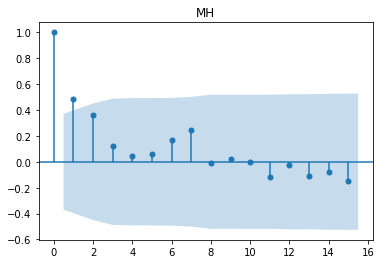

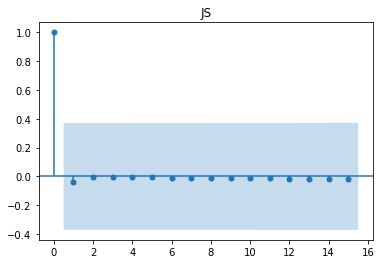

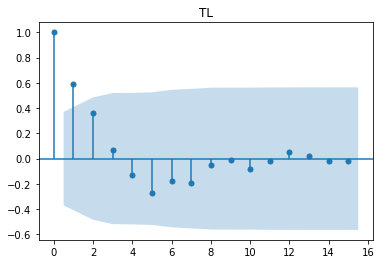

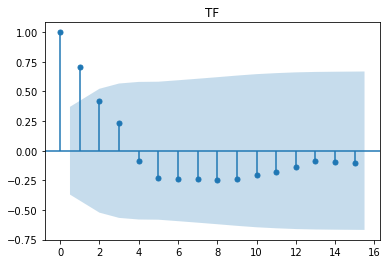

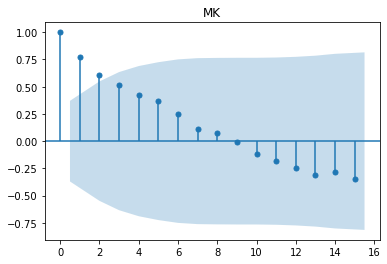

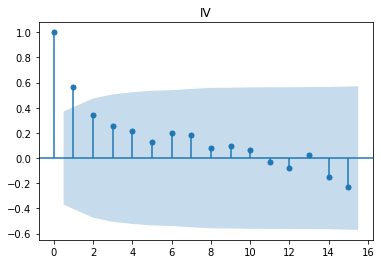

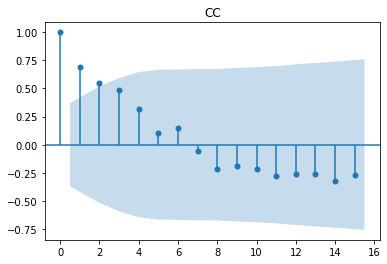

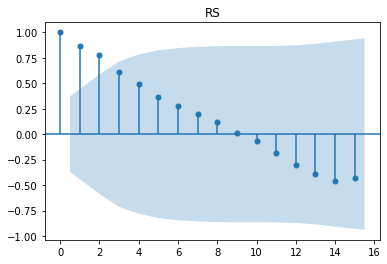

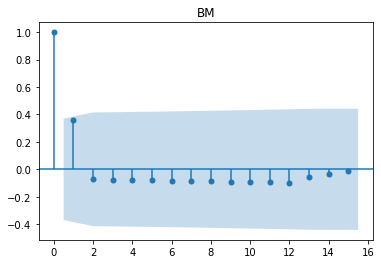

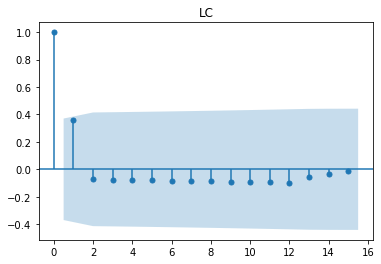

In [ ]:

plot_acf(LB, title="LB")
plot_acf(GF, title="GF")
plot_acf(JK, title="JK")
plot_acf(BG, title="BG")
plot_acf(CJ, title="CJ")
plot_acf(YG, title="YG")
plot_acf(ML, title="ML")
plot_acf(MP, title="MP")
plot_acf(GR, title="GR")
plot_acf(DB, title="DB")
plot_acf(MH, title="MH")
plot_acf(JS, title="JS")
plot_acf(TL, title="TL")
plot_acf(TF, title="TF")
plot_acf(MK, title="MK")
plot_acf(IV, title="IV")
plot_acf(CC, title="CC")
plot_acf(RS, title="RS")
plot_acf(BM, title="BM")
plot_acf(LC, title="LC")


again i wanted to see how cyclic the behaviour was so i plotted some autocorrelation functions for each person and there were some poeple like the initial plots suggested who began with very cyclic behaviour but that then tapered off in the second half. there were some individuals with repeating patterns the whole way such as MK and RS who had very repeating correlations which is interesting as these individuals were those that started the time drinking 0 cups and then began drinking coffee during the later half of the data.

In [ ]:
half1=df[df['NAME']<=14]
half2=df[df['NAME']>14]
binary=(df['NAME']<=14)
dfbinary= binary.astype(int)

[1      True
 2      True
 3      True
 4      True
 5      True
 6      True
 7      True
 8      True
 9      True
 10     True
 11     True
 12     True
 13     True
 14     True
 15    False
 16    False
 17    False
 18    False
 19    False
 20    False
 21    False
 22    False
 23    False
 24    False
 25    False
 26    False
 27    False
 28    False
 Name: NAME, dtype: bool]

here i create a binary to split the averages into the first half of the time and the second half of the time

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(ave.reshape(-1,1), months,  test_size=20, random_state=1)

In [ ]:
here i am creating my path for the linear regression function to optimise and then create test values for the averages

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


here i am actually creating the linear regression model which i can then fit to the values i created earlier

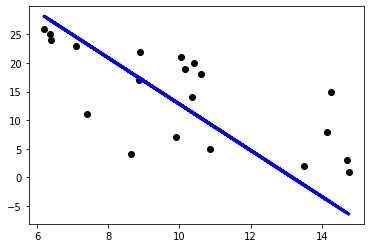

In [ ]:
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, color="blue", linewidth=3)


plt.show()

this shows my linear regression which fits my data quite nicely in the first half but due to the change in the second half doesnt fit as well in the second half but overall it shows the general trend of the cups of coffee drank decreasing as time increases.

In [ ]:
x1=ave1
x2=ave2
months14=np.arange(0,14,1)
xmin, xmax =0 , np.max(ave)
ymin, ymax = np.min(months), np.max(months)


here i am just setting up my data to go into the machine learning techniques

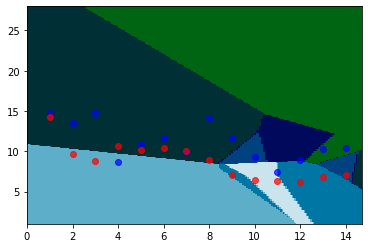

In [ ]:
clf =SVC(kernel='linear')
model3 = clf.fit(np.dstack([ave1,ave2])[0],half1['NAME'])

xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.1), np.arange(ymin, ymax, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.contourf(xx, yy, Z, alpha=1,
                 cmap='ocean')

plt.scatter(half1['NAME'],ave1, color='b', zorder = 1, alpha=0.7)
plt.scatter(half1['NAME'],ave2,  color='r', zorder = 1, alpha=0.7)



plt.show()

this is a support vector machine its supposed to show using two middling results the seperation between the first set of data in this case being the averages from the 1st 14 months and the average from the second 14 months. they are very close so it has done a reasonable job however because the two are so close it has not seperated the results out entirely

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf2 = KNeighborsClassifier(2)
model2 = clf2.fit(np.dstack((x1,x2))[0],half1['NAME'])

because the svm didnt do a great job of sperating the results i wanted to try another machine learning technique in the nearest neigbour classicifaction, my hope was because svm uses straight line vectors to classify the results into two categories and the results were somewhat overlapping the nearest neighbour classifier would create non linear lines around the results that were either side of the line.

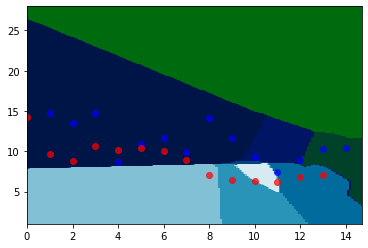

In [ ]:
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.1), np.arange(ymin, ymax, 0.01))


Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.contourf(xx, yy, Z, alpha=1,
                 cmap='ocean')

plt.scatter(half1['NAME'],ave1, color='b', zorder = 1, alpha=0.7)
plt.scatter(months14,ave2,  color='r', zorder = 1, alpha=0.7)



plt.show()

this approach gave me better classification in the second half but i think due to the nature of the data being so intertwined it did a worse job of classifying the data into seperate portions in the first half of the data.

overall after reviewing the data that i found, i believe due to the correlations i was looking for the autocorrelation function was the best way to represent the data. this showed that the data was not as i first believed to be a cyclic event where patterns would repeat on a roughly 12 month basis but that the pattern was cyclic in the first half and showed a drop in the second half. the regression technique was good for showing that there was definitely a negative correlation from the first half of the time to the second however because the results had a lot of outliers this did not fit the data as well as i would have hoped given the results from the acf, however overall it did do a reasonable job of proving that the average amount of coffee drank decreased when going from the first year to the secon year. the two machine learning techniques were nteresting to look at however i think because the data was close they unable to show a clear boundry between the first half of the data and the second half, they both did a decent job of showing the difference when it came to the last few months and the latter half of the first 14 months as this was where the biggest difference was but because the middling months were so close together and overlapping in some parts they were not fully able to show seperation between the two.
to rank the methods i used for suitability to my specific data set i would say the scf did the best job, the linear regression did a good job with the first half of the data because it was closer together and a bad job with the second half of the data, and the machine learning techniques did a bad job with the first half of the data but a good job with the second half of the data.
if i were to test this data again i would still use all three techniques as each did a good job with specific parts of the data that i would want to look at but i would put more focus on the auto correlation function as that showed exactly what i was trying to test with the data and proved my initial assumption wrong which was interesting to see.
